In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, Binarizer
from sklearn.compose import ColumnTransformer

In [4]:
df = sns.load_dataset('titanic')

In [6]:
df = df[['age','fare','survived']]

In [7]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [8]:
df.dropna(inplace=True)

/tmp/ipython-input-1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
df.shape

(714, 3)

In [11]:
X = df.iloc[:,0:2]
Y= df.iloc[:,-1]

In [12]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [13]:
clf= DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6363636363636364

In [15]:
cross_val_score(DecisionTreeClassifier(),X,Y,cv=10, scoring = 'accuracy').mean()

np.float64(0.631631455399061)

In [29]:
Kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [30]:
trf = ColumnTransformer([
    ('first',Kbin_age,[0]),
    ('second',Kbin_fare,[1])
])

In [31]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [32]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [33]:
output = pd.DataFrame({
    'age':X_train['age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['fare'],
    'fare_trf':X_train_trf[:,1],
})

In [34]:
output['age_labels']= pd.cut(x=X_train['age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']= pd.cut(x=X_train['fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [35]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
142,24.0,5.0,15.8500,7.0,"(23.0, 25.0]","(14.454, 18.75]"
806,39.0,11.0,0.0000,0.0,"(38.0, 42.0]",NaN
683,14.0,1.0,46.9000,11.0,"(6.0, 16.0]","(31.275, 51.479]"
333,16.0,2.0,18.0000,7.0,"(6.0, 16.0]","(14.454, 18.75]"
195,58.0,14.0,146.5208,14.0,"(54.0, 80.0]","(108.9, 512.329]"


In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,Y_train)
Y_pred2 = clf.predict(X_test_trf)
accuracy_score(Y_test,Y_pred2)

0.6363636363636364

In [37]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy'))

np.float64(0.6723004694835681)

In [46]:
def discretize (bins,strategy):
    Kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    Kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
    ('first',Kbin_age,[0]),
    ('second',Kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy')))

    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(X['age'])
    plt.title('Age before')
    plt.subplot(122)
    plt.hist(X_trf[:,0], color = 'red')
    plt.title('age after')
    plt.show()

    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(X['fare'])
    plt.title('Fare before')
    plt.subplot(122)
    plt.hist(X_trf[:,1], color = 'red')
    plt.title('fare after')
    plt.show()

0.682140062597809


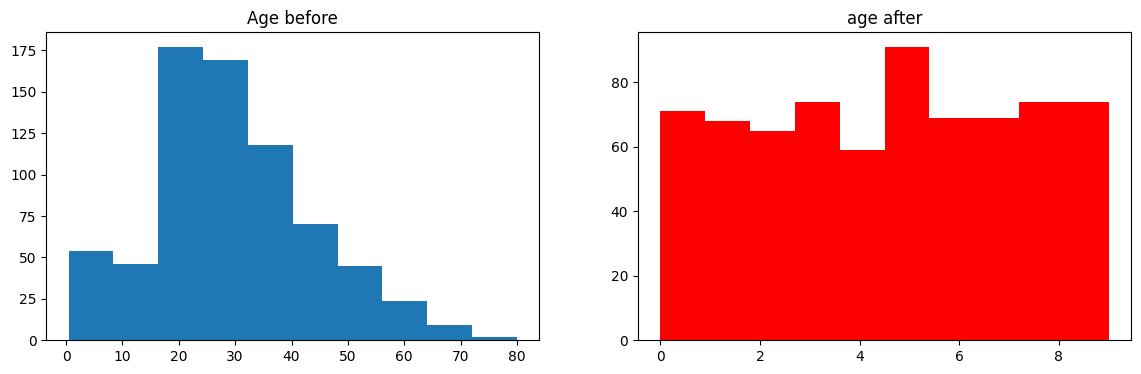

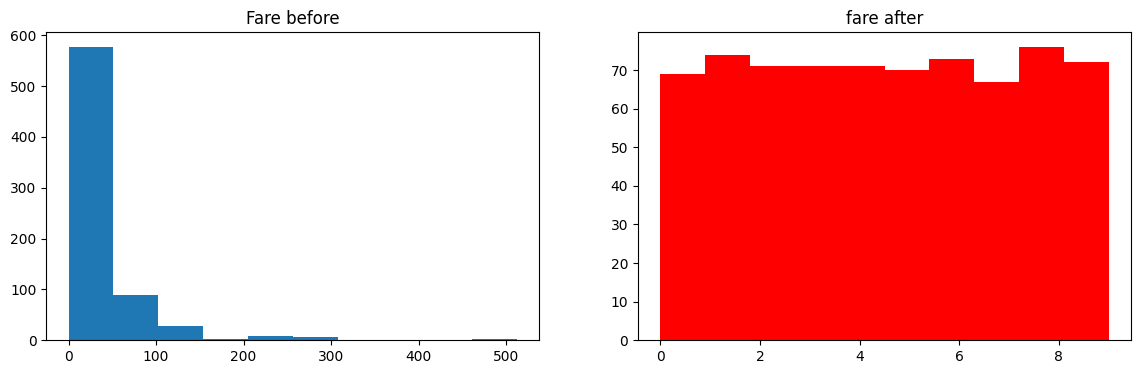

In [47]:
discretize(10,'quantile')

0.6864632237871675


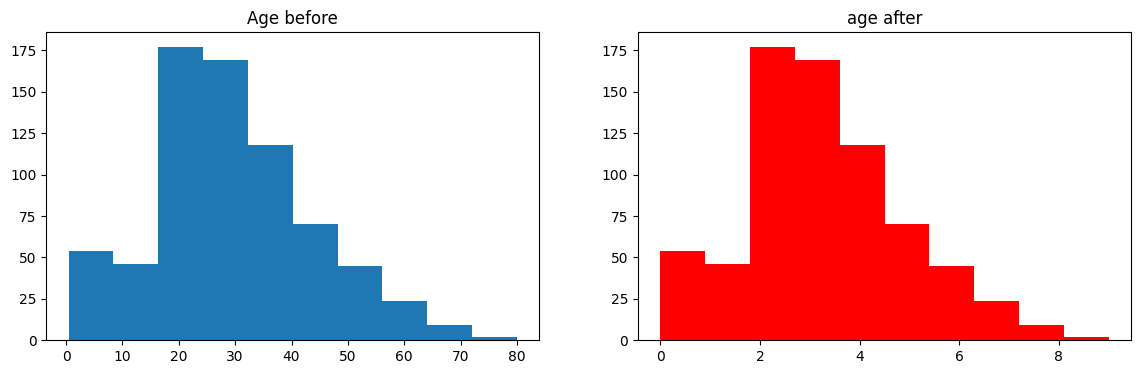

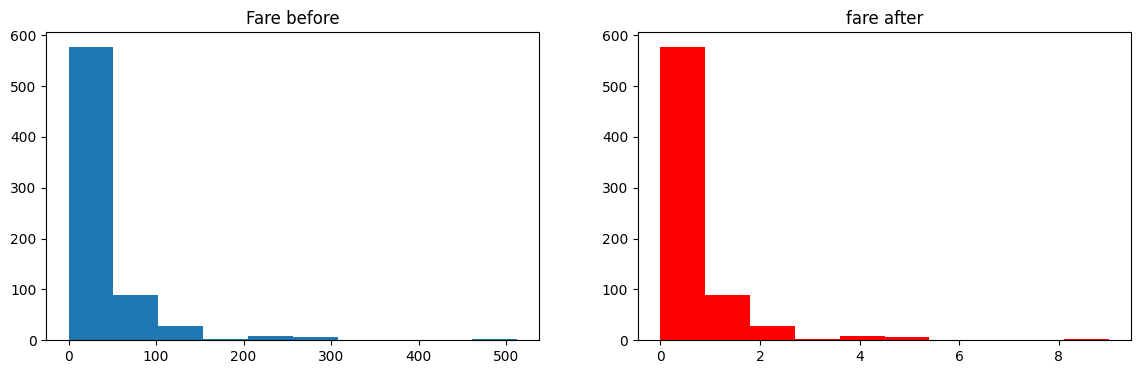

In [48]:
discretize(10,'uniform')

0.6723982785602504


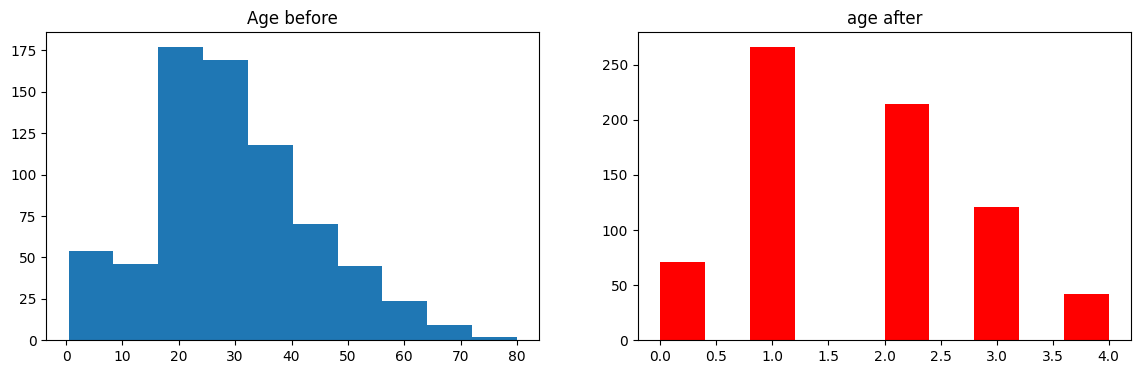

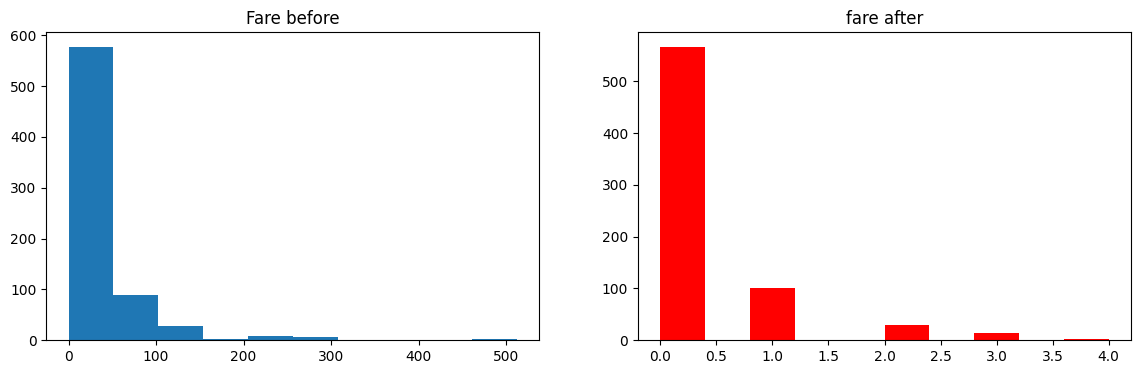

In [50]:
discretize(5,'kmeans')

# **Binarisation**

In [63]:
df1 = sns.load_dataset("titanic")
df1 = df1[['age','fare','sibsp','parch','survived']]
df1.dropna(inplace=True)

In [64]:
df1['family'] = df1['sibsp']+df1['parch']

In [65]:
df1.head()

,age,fare,sibsp,parch,survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [66]:
df1.drop(columns=['sibsp','parch'],inplace=True)

In [67]:
df1.head()

,age,fare,survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [69]:
X = df1.drop(columns=['survived'])
Y = df1['survived']

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [71]:
trf1 = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [72]:
X_train_trf1 = trf1.fit_transform(X_train)
X_test_trf1 = trf1.transform(X_test)

In [73]:
pd.DataFrame(X_train_trf1,columns=['family_trf','age','fare'])

,family_trf,age,fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [74]:
clf= DecisionTreeClassifier()
clf.fit(X_train_trf1,Y_train)
Y_pred3 = clf.predict(X_test_trf1)
accuracy_score(Y_test,Y_pred3)

0.6013986013986014

In [75]:
X_trf1 = trf1.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf1,Y,cv=10,scoring ='accuracy'))

np.float64(0.6346439749608763)